# Topic Modeling with CorEx

## Setup

In [1]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle 

# sklearn
from sklearn.feature_extraction.text import CountVectorizer

# corex
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

# bespoke
from preprocessing_funcs import clean_tweet, get_hashtags, get_emojis

In [ ]:
#df = pd.read_csv('../data_files/processed_tweets.zip')

In [2]:
with open('../data_files/tweets.pickle', 'rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df.head()

,text,clean,processed
0,#IslamKills Are you trying to say that there w...,islam kills are you trying to say that there w...,islam kill try say terrorist attack europe ref...
1,"Clinton: Trump should’ve apologized more, atta...",clinton trump should ve apologized more attack...,clinton trump apologize attack little
2,RT @ltapoll: Who was/is the best president of ...,who was is the best president of the past year...,well president past retweet
3,RT @jww372: I don't have to guess your religio...,i don t have to guess your religion christmas ...,guess religion christmas aftermath
4,RT @Shareblue: Pence and his lawyers decided w...,pence and his lawyers decided which of his off...,pence lawyer decide official email public can see


## Topic Modeling

### Cleaned (not lemmatized) Tweets - no anchors

In [4]:
clean_tweets = df.clean

In [5]:
proc_tweets = df.processed

In [6]:
vectorizer = CountVectorizer(#max_features=60000,
                             token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True,
                             stop_words='english')

doc_word = vectorizer.fit_transform(clean_tweets)
words = list(np.asarray(vectorizer.get_feature_names()))

In [7]:
topic_model = ct.Corex(n_hidden=10, 
                       words=words,
                       max_iter=200, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=clean_tweets)

In [8]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: merkel, muss, bleiben, der, die, survival, ist, thanksgiving, und, guide
1: trump, hillary, clinton, donald, real, campaign, vote, maga, gop, president
2: tcot, pjnet, ccot, cruz, mt, tea, ted, wake, america, oscar
3: police, muslim, refugees, muslims, islamic, terrorist, killed, attack, iran, terror
4: news, obama, post, new, politics, state, fox, russia, dnc, breaking
5: midnight, alternative, debates, better, san, fishtv, drunkbands, redneckamovie, dogsongs, addamovieruinamovie
6: magazine, falls, com, khan, newt, gingrich, water, phosphorus, akbar, album
7: islam, christmas, kills, gift, ideas, politicians, aftermath, brussels, year, old
8: don, know, people, black, lives, matter, just, right, doesn, think
9: like, twitter, looks, cyber, censorship, reallifemagicspells, things, warren, elizabeth, kim


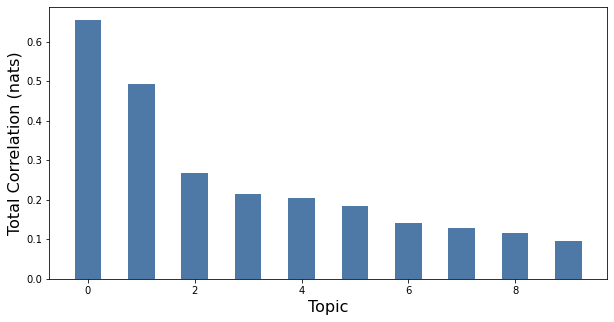

In [9]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16)
plt.show()

In [39]:
def show_top_tweets(topic_model, num_tweets_to_show):
    for i in range(len(topics)):
        print(f'Topic {i}')
        top_tweets = [tweet[0] for tweet in topic_model.get_top_docs(topic=i, n_docs=num_tweets_to_show)]
        print(top_tweets, '\n')

In [40]:
show_top_tweets(topic_model, 5)

Topic 0
['bislang waren diese konkurrenten ausnahmslos m nner merkel muss bleiben', 't rkische zeitung nennt merkel  schlimmer als hitler  und was ist dann erdogan', 'ddie probleme der afd w hler werden bei merkel und der cdu ernst genommen merkel muss bleiben', 'peter theisen sehr geehrter theisen \r\nw rden sie merkel noch ein mal w hlen merkel muss bleiben', 'notte quartogrado quartograders gianluiginuzzi a meluzzi passate un buon we felice\r\ngrazie'] 

Topic 1
['and what will hillary clinton or real donald trump i will vote who has the best solution palestinian lives matte ', 'pat toomey denounces trump clinton but won t say who he will support', 'hillary s campaign is in total meltdown desperation mode \n\n crooked hillary\n lockherup \n wikileaks ', 'women \n blacks \n jobless \n\nicymi\n hillary clinton s life of deceit \nseen through leaked emails \n\n  \nhtt ', 'trump takes on clinton over leaked basement dweller comments politics'] 

Topic 2
['mt why vote for anyone less vot

Not great -- run it again with processed tweets.

In [ ]:
vectorizer = CountVectorizer(token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True,
                             stop_words='english')

doc_word = vectorizer.fit_transform(proc_tweets)
words = list(np.asarray(vectorizer.get_feature_names()))

In [ ]:
topic_model = ct.Corex(n_hidden=10, 
                       words=words,
                       max_iter=200, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=proc_tweets)

In [ ]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

In [ ]:
anchor_topics = [['donald', 'trump', 'maga'],                                             # trump stuff
                ['hillary', 'clinton'],                                                  # hillary stuff
                ['merkel', 'muss', 'die', 'ist', 'ich', 'das'],                          # german stuff
                ['color', 'blm', 'black', 'matt', 'oscar', 'racism', 'blacktwitter'],    # BLM/race stuff
                ['police', 'officer', 'shoot'],                                          # police stuff
                ['obama', 'barack'],                                                     # obama stuff
                ['isis', 'muslim', 'islam']                                              # isis/islam stuff
               ]

len(anchor_topics)

In [ ]:
vectorizer = CountVectorizer(token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True,
                             stop_words='english')

doc_word = vectorizer.fit_transform(tweets)
words = list(np.asarray(vectorizer.get_feature_names()))

In [ ]:
topic_model = ct.Corex(n_hidden=10, 
                       words=words,
                       max_iter=200, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=tweets, 
                anchors=anchor_topics, anchor_strength=6)

In [ ]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

In [ ]:
# Let's check out topic : graphics
topic_model.get_top_docs(topic=0, n_docs=10)

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16)
plt.show()

In [ ]:
topic_model.tc

In [ ]:
anchor_topics = [['donald', 'trump'],
                 ['donald', 'trump'],
                 ['donald', 'trump'],
                 ['donald', 'trump'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['merkel', 'muss', 'die', 'ist', 'ich', 'das'],
                ]

len(anchor_topics)

In [ ]:
vectorizer = CountVectorizer(token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True,
                             stop_words='english')

doc_word = vectorizer.fit_transform(tweets)
words = list(np.asarray(vectorizer.get_feature_names()))

topic_model = ct.Corex(n_hidden=14, 
                       words=words,
                       max_iter=200, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=tweets, 
               anchors=anchor_topics, anchor_strength=5)

In [ ]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16)
plt.show()

In [ ]:
topic_model.tc

In [ ]:
anchor_topics = [['donald', 'trump'],
                 ['donald', 'trump'],
                 ['donald', 'trump'],
                 ['donald', 'trump'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['merkel', 'muss', 'die', 'ist', 'ich', 'das'],
                 ['police', 'officer', 'cop'],
                 ['barack', 'obama'], 
                 ['nowplaying', 'music', 'soundcloud']
                ]

len(anchor_topics)

In [ ]:
vectorizer = CountVectorizer(token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True,
                             stop_words='english')

doc_word = vectorizer.fit_transform(tweets)
words = list(np.asarray(vectorizer.get_feature_names()))

topic_model = ct.Corex(n_hidden=16, 
                       words=words,
                       max_iter=200, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=tweets, 
               anchors=anchor_topics, anchor_strength=5)

In [ ]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16)
plt.show()

In [ ]:
topic_model.tc

In [ ]:
topic_model.clusters, len(topic_model.clusters)

In [ ]:
topic_model.clusters[:10]

In [ ]:
type(topics)

In [ ]:
topics

In [ ]:
doc_word

In [ ]:
doc_matrix = pd.DataFrame(doc_word)


In [ ]:
topic_model.tcs

In [ ]:
len(topic_model.tcs)